<a href="https://colab.research.google.com/github/Akanerd/NaturalLanguangeProcessing-Orbit/blob/main/Hands_on_NLP_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM : BAHASA INDONESIA

In [ ]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = 'https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv'
spam_bi = pd.read_csv(data)
spam_bi

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0


In [ ]:
spam_bi[spam_bi.label == 0]

,teks,label
574,Di kfc yg deket enhaii ada dy,0
575,"Maaf jika ada janji yang belum terpenuhi, jik...",0
576,*ngsih bunga ato coklat min,0
577,.sambl nunggu itu.. Gimana kalo ngerjain form ...,0
578,[Akademik] Untuk perhatian tuk jadwal kontrak ...,0
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0


In [ ]:
spam_bi[spam_bi.label == 1]

,teks,label
239,"Jika anda bermasalah dgn CC/KT@, stres dgn bun...",1
240,"Lelah byr min payment? Kami Solusinya, bantu s...",1
241,"Dana Tunai (KTA) bunga 0,99% hingga 300 jt. Sy...",1
242,“ROXI CELL” Hanya dengan Rp.100rb Anda bisa ja...,1
243,3 RAMADHAN Selamat Anda Pemenang Rp.100jt. PIN...,1
...,...,...
569,Yth Bpk/Ibu. BNI menyatakan Rekening anda terp...,1
570,Yth Isti Sofiyah. Diminta Segera Hubungi Bpk D...,1
571,YTH kpd bpk/ibu sy Eka Novitasari kariyawan 3c...,1
572,"YTH,MIitra Silahkan cek poin anda dan tukarkan...",1


In [ ]:
spam_bi[spam_bi.label == 2]

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
...,...,...
234,"Yuk INTERNET-an NGEBUT utk akses FB, Twitter, ...",2
235,"Yuk temen belanja di google play, mudah banget...",2
236,Yuk tetap gunakan Flash Volume Ultima utk upda...,2
237,Mau nonton bioskop gratis bersama keluarga? Ci...,2


Label:


*   0 : PESAN NORMAL
*   1 : SPAM/FRAUD
*   2 : SMS PROMOSI



In [ ]:
print('data kategori 2 sebanyak: ' + str(spam_bi[spam_bi.label == 2].shape[0]))

data kategori 2 sebanyak: 239


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


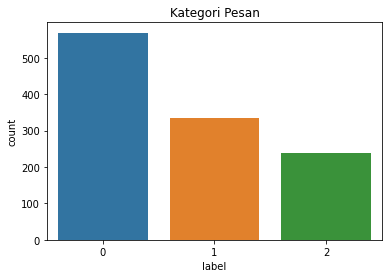

In [ ]:
plt.title('Kategori Pesan')
sns.countplot(spam_bi.label)
#tidak seimbang

##Preprocessing data teks

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 5.0 MB/s 


In [ ]:
import re
import nltk

1. Case Folding
2. Tokenizer
3. Stop word + remove punctuation
4. Stemming + Lemmatization

In [ ]:
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = re.sub(r' +', ' ', text)                      #white space
  text = text.strip()
  return text

In [ ]:
spam_bi['teks'].iloc[5]

'5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1'

In [ ]:
teks_5 = spam_bi['teks'].iloc[5]
x_5 = casefolding(teks_5)

In [ ]:
x_5

'hari lagi ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel'

In [ ]:
#tokenisasi memperhatikan spasi sebagai pemisah
x.split()

['hari',
 'lagi',
 'ekstra',
 'pulsa',
 'rb',
 'dg',
 'beli',
 'paket',
 'internet',
 'bulanan',
 'di',
 'mytelkomsel',
 'utk',
 'pembelian',
 'pertama',
 'sjk',
 'augsept',
 'cek',
 'detail',
 'promo',
 'di',
 'tselmemytsel']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_ind = stopwords.words('indonesian')
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
len(stopwords_ind)

758

In [ ]:
#menambahkan stopwords dari NLTK
tambahan_stopwords = ['rb', 'gb', 'tsel']
stopwords_ind = stopwords_ind + tambahan_stopwords

In [ ]:
#stopword
def remove_stopword(teks) :
  clean_teks = []
  teks = teks.split()
  for i in teks :
    if i not in stopwords_ind:
      clean_teks.append(i)
  return " ".join(clean_teks)

In [ ]:
teks_5

'5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1'

In [ ]:
x_5_sw = remove_stopword(x_5)

In [ ]:
#stemming dan Lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer_factory = StemmerFactory()
ina_stemmer = stemmer_factory.create_stemmer()


In [ ]:
def stemming(teks):
  teks = ina_stemmer.stem(teks)
  return teks

In [ ]:
stemming(x_5_sw)

'ekstra pulsa dg beli paket internet bulan mytelkomsel utk beli sjk augsept cek detail promo tselmemytsel'

In [ ]:
#normalization (perbaikan berdasarkan kamus)
#woww -->wow    , wowww -->?

In [ ]:
kamus_normalisasi = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
kamus_normalisasi.head(5)

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi


In [ ]:
def normalisasi(text):
  text = ' '.join([kamus_normalisasi[kamus_normalisasi['singkat'] == word]['hasil'].values[0] if (kamus_normalisasi['singkat'] == word).any() else word for word in text.split()])
  return text

In [ ]:
normalisasi('abis')

'habis'

###Pipeline NLP

In [ ]:
def preprocessing(teks):
  teks = casefolding(teks)
  teks = remove_stopword(teks)
  teks = stemming(teks)
  teks = normalisasi(teks)
  return teks

In [ ]:
preprocessing('Pembelian PAKET INternet 30 gb sudah terlaksana')

'beli paket internet laksana'

In [ ]:
%%time
spam_bi['clean'] = spam_bi['teks'].apply(preprocessing)

CPU times: user 6min 44s, sys: 1.07 s, total: 6min 45s
Wall time: 6min 48s


In [ ]:
spam_bi

,teks,label,clean
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash my telkomsel app dapat ...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,rupiah ribu spesial pilih aktif promo sd novem...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,pulang yang terhormat sisa kuota flash kb down...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,pulang yang terhormat sisa kuota flash kb down...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,rupiah ribu spesial pilih aktif buru skb
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,tidak ada nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer


In [ ]:
spam_bi.to_csv('/content/drive/MyDrive/EUNOIA/data_clean.csv')

Text Featurization and Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [ ]:
X = spam_bi.clean
y = spam_bi.label

In [ ]:
vec_uni = CountVectorizer(ngram_range=(1,1))
vec_uni.fit(X)

CountVectorizer()

In [ ]:
print(len(vec_uni.get_feature_names_out()))

3359


In [ ]:
vec_Bi = CountVectorizer(ngram_range=(2,2))
vec_Bi.fit(X)
print(vec_Bi.get_feature_names_out())

['aa aa' 'aa nya' 'aa sih' ... 'zona detail' 'zona lokasi' 'ztkm uinfo']


In [ ]:
kalimat = ['saya bermain bola','saya sedang belajar']
vec_Bi = CountVectorizer(ngram_range=(2,2))
vec_Bi.fit(kalimat)
print(vec_Bi.get_feature_names_out())

['bermain bola' 'saya bermain' 'saya sedang' 'sedang belajar']


In [ ]:
kalimat = ['saya bermain bola','saya sedang belajar']
vec_Bi = CountVectorizer(ngram_range=(1,1))
vec_Bi.fit(kalimat)
print(vec_Bi.get_feature_names_out())

['belajar' 'bermain' 'bola' 'saya' 'sedang']


In [ ]:
print(vec_uni.get_feature_names_out())

['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [ ]:
print(vec_Bi.get_feature_names_out())

['aa aa' 'aa nya' 'aa sih' ... 'zona detail' 'zona lokasi' 'ztkm uinfo']


In [ ]:
#ubah dalam bentuk array
X_unigram = vec_uni.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#unigram
data_unigram = pd.DataFrame(X_unigram, columns=vec_uni.get_feature_names_out())
data_unigram

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#ubah dalam bentuk array
X_bigram = vec_Bi.transform(X).toarray()

#Bigram
data_bigram = pd.DataFrame(X_bigram, columns=vec_Bi.get_feature_names_out())
data_bigram

,aa aa,aa nya,aa sih,aa tidak,aamiin terimakasih,ab callsms,abadi big,abai tidak,abbee cek,abdul rahman,...,yuk temen,yuks internetan,yuni shara,yunit mobil,zalora rprb,zarkasi nomor,zjt iphone,zona detail,zona lokasi,ztkm uinfo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
spam_bi[spam_bi['clean'].str.contains('zona')]

,teks,label,clean
11,Anda akan berlangganan paket Rp. 10000 utk 150...,2,langgan paket rupiah untuk mbak tidak mbak gha...
234,"Yuk INTERNET-an NGEBUT utk akses FB, Twitter, ...",2,yuk internetan mengebut untuk akses fb twitter...
238,Yuks internetan seru-seruan dg Flash Volume Ul...,2,yuks internetan seruseruan dengan flash volume...


###cek data sebelum preprocessing
```
WordCloud().process_text(text) #mengurutkan kata dengan frekuensi tertinggi
```

In [ ]:
pd.Series(' '.join(spam_bi.teks).split()).value_counts()
#perlu dilakukan casefolding

di               353
ke               198
Anda             131
anda             126
yg               119
                ... 
As,                1
pangmeserkeun      1
Mamah              1
ayena              1
bri                1
Length: 7425, dtype: int64

In [ ]:
pd.Series(' '.join(spam_bi.clean).split()).value_counts()

yang           163
tidak          162
informasi      159
nomor          154
hadiah         123
              ... 
reg              1
hypermind        1
hubcustumer      1
ptplanet         1
tranfer          1
Length: 3378, dtype: int64

In [ ]:
def frekuensi_kata(teks):
  kalimat = []
  for i in teks:
    kalimat.append(i)
  return ' '.join(kalimat)

In [ ]:
corpus_clean = frekuensi_kata(spam_bi.clean)
corpus = frekuensi_kata(spam_bi.teks)

In [ ]:
frek_clean = WordCloud().process_text(corpus_clean)
frek = WordCloud().process_text(corpus)

In [ ]:
def sort_dict_by_value(d, reverse = True):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

In [ ]:
print(sort_dict_by_value(frek))

{'di': 332, 'ke': 139, 'aku': 121, 'dan': 113, 'mau': 106, 'ini': 97, 'aja': 96, 'yg': 95, 'Info': 91, 'dari': 88, 'nama1': 88, 'saya': 86, 'ada': 80, 'ya': 78, 'untuk': 77, 'yang': 73, 'atau': 72, 'bisa': 70, 'Anda': 68, 'hub': 68, 'utk': 59, 'Promo': 58, 'cek': 57, 'nya': 56, 'klik': 55, 'SM': 55, 'pulsa': 52, 'dengan': 51, 'pak': 48, 'ketik': 47, 'jam': 47, 'info klik': 47, 'blogspot': 46, 'Paket': 44, 'GRATIS': 44, 'ga': 44, 'kamu': 43, 'dr': 43, 'kami': 43, 'isi ulang': 43, 'dgn': 41, 'Selamat Anda': 41, 'kita': 40, 'Rp': 39, 'kalau': 39, 'kalo': 39, 'nanti': 37, 'hari': 36, 'sama': 36, 'itu': 36, 'maaf': 35, 'kuota': 34, 'BONUS': 34, 'sy': 34, 'PIN Pemenang': 34, 'hanya': 33, 'teh': 33, 'Cuma': 33, 'pake': 32, 'hari ini': 32, 'lagi': 31, 'Internetan': 31, 'berlaku': 31, 'Nikmati': 30, 'apa': 30, 'jadi': 30, 'di tsel': 30, 'baru': 29, 'sudah': 29, 'udah': 29, 'tp': 29, 'dulu': 29, 'kan': 29, 'juga': 28, 'Dapatkan': 28, 'Internet': 27, 'lg': 27, 'TRI CARE': 27, 'besok': 26, 'web': 

TF-IDF

In [ ]:
vec_tfidf_uni = TfidfVectorizer(ngram_range=(1,1))
vec_tfidf_uni.fit(X)

TfidfVectorizer()

In [ ]:
print(vec_tfidf_uni.get_feature_names_out())

['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [ ]:
#ubah dalam bentuk array
X_unigram_tfidf = vec_tfidf_uni.transform(X).toarray()

#Unigram
data_unigram_tfidf = pd.DataFrame(X_unigram_tfidf, columns=vec_tfidf_uni.get_feature_names_out())
data_unigram_tfidf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vec_tfidf_bi = TfidfVectorizer(ngram_range=(2,2))
vec_tfidf_bi.fit(X)

#ubah dalam bentuk array
X_bigram_tfidf = vec_tfidf_bi.transform(X).toarray()

#Bigram
data_bigram_tfidf = pd.DataFrame(X_bigram_tfidf, columns=vec_tfidf_bi.get_feature_names_out())
data_bigram_tfidf

,aa aa,aa nya,aa sih,aa tidak,aamiin terimakasih,ab callsms,abadi big,abai tidak,abbee cek,abdul rahman,...,yuk temen,yuks internetan,yuni shara,yunit mobil,zalora rprb,zarkasi nomor,zjt iphone,zona detail,zona lokasi,ztkm uinfo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Feature Selection

In [ ]:
X_baru = np.array(data_bigram_tfidf)
y_label = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [ ]:
chi2_features = SelectKBest(chi2, k = 1000) 
X_kbest_features = chi2_features.fit_transform(X_baru, y_label) 

In [ ]:
print('Original feature number:', X_baru.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 9063
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.270649
1,0.336262
2,0.270649
3,0.451771
4,0.816603
...,...
9058,0.476880
9059,0.619230
9060,0.726135
9061,1.741582


In [ ]:
#Menampilkan fitur beserta nilainya
feature =vec_tfidf_bi.get_feature_names()
feature

Data['Fitur'] = feature
Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.270649,aa aa
1,0.336262,aa nya
2,0.270649,aa sih
3,0.451771,aa tidak
4,0.816603,aamiin terimakasih
...,...,...
9058,0.476880,zarkasi nomor
9059,0.619230,zjt iphone
9060,0.726135,zona detail
9061,1.741582,zona lokasi


In [ ]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
5931,12.875798,pin menang
749,12.795301,beli paket
2840,12.613020,indosat ooredoo
8460,11.967264,uinfo klik
7036,11.785498,selamat nomor
...,...,...
7950,0.168131,temu tempat
4914,0.167748,moga yang
8789,0.159671,wr wb
8036,0.156203,tetapi tidak


In [ ]:
mask =chi2_features.get_support()
mask

array([False, False, False, ..., False,  True, False])

In [ ]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['ada uinfo',
 'agen pulsa',
 'akses dapat',
 'aktif bronetjam',
 'aktif buru',
 'aktif cek',
 'aktif iring',
 'aktif laku',
 'aktif nikmat',
 'aktif otomatis',
 'aktif paket',
 'aktif promo',
 'aktif sd',
 'all new',
 'all operator',
 'aman hubungi',
 'aman klik',
 'ambil bonus',
 'an xxx',
 'andabch informasi',
 'andromax tidak',
 'angka jitu',
 'angsur bayar',
 'apa apa',
 'aplikasi mycare',
 'aplikasi mytelkomsel',
 'app dapat',
 'app sjk',
 'apps untuk',
 'appsinapps google',
 'as cek',
 'aug september',
 'avanza dari',
 'axiata mu',
 'axis pasti',
 'axis telepon',
 'ayo buru',
 'ayo coba',
 'ayo datang',
 'ayo download',
 'ayo isi',
 'balas flashspasiya',
 'balas sms',
 'banget loh',
 'banget main',
 'bank bni',
 'bank bri',
 'bank brinorekanir',
 'bank mandiri',
 'bank xxx',
 'banyak appsinapps',
 'bapak yang',
 'baru tselmeas',
 'batas informasi',
 'batas sk',
 'bawa pulang',
 'bayar harap',
 'bb dakota',
 'bb davis',
 'bb gemini',
 'bb onyx',
 'bb torch',
 'bbm gratis',
 'bbm 

In [ ]:
new_feature

['ada uinfo',
 'agen pulsa',
 'akses dapat',
 'aktif bronetjam',
 'aktif buru',
 'aktif cek',
 'aktif iring',
 'aktif laku',
 'aktif nikmat',
 'aktif otomatis',
 'aktif paket',
 'aktif promo',
 'aktif sd',
 'all new',
 'all operator',
 'aman hubungi',
 'aman klik',
 'ambil bonus',
 'an xxx',
 'andabch informasi',
 'andromax tidak',
 'angka jitu',
 'angsur bayar',
 'apa apa',
 'aplikasi mycare',
 'aplikasi mytelkomsel',
 'app dapat',
 'app sjk',
 'apps untuk',
 'appsinapps google',
 'as cek',
 'aug september',
 'avanza dari',
 'axiata mu',
 'axis pasti',
 'axis telepon',
 'ayo buru',
 'ayo coba',
 'ayo datang',
 'ayo download',
 'ayo isi',
 'balas flashspasiya',
 'balas sms',
 'banget loh',
 'banget main',
 'bank bni',
 'bank bri',
 'bank brinorekanir',
 'bank mandiri',
 'bank xxx',
 'banyak appsinapps',
 'bapak yang',
 'baru tselmeas',
 'batas informasi',
 'batas sk',
 'bawa pulang',
 'bayar harap',
 'bb dakota',
 'bb davis',
 'bb gemini',
 'bb onyx',
 'bb torch',
 'bbm gratis',
 'bbm 

In [ ]:
data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,ada uinfo,agen pulsa,akses dapat,aktif bronetjam,aktif buru,aktif cek,aktif iring,aktif laku,aktif nikmat,aktif otomatis,...,yang telepon,yang terhormat,yank tolong,yaris pin,yaris pinjf,yaris uinfo,yrkz informasi,yuk temen,yunit mobil,zona lokasi
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.17807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.17807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.417485,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Word Cloud

In [ ]:
import cv2

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-03-28 08:58:28--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0s      

2022-03-28 08:58:28 (78.3 MB/s) - ‘cloud.jpg’ saved [34396/34396]



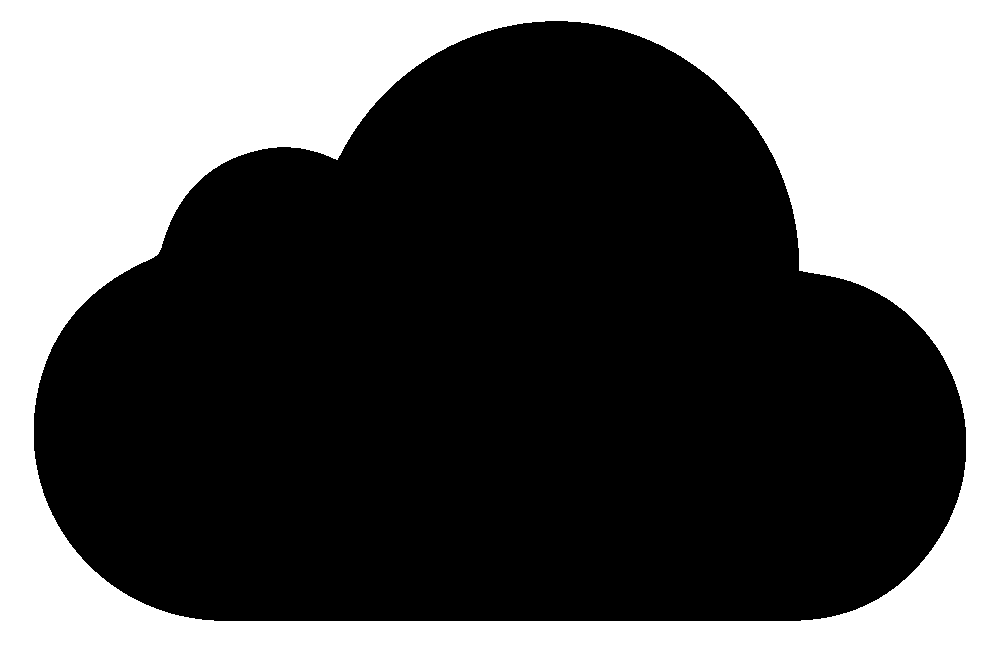

In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

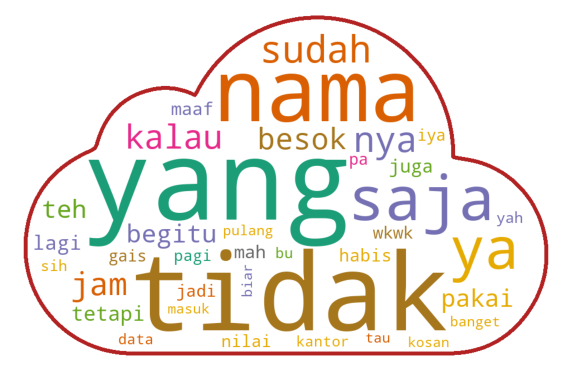

In [ ]:
# WordCloud Label SMS Normal

sms_normal = spam_bi[spam_bi.label == 0]
normal_string = []

for t in sms_normal.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

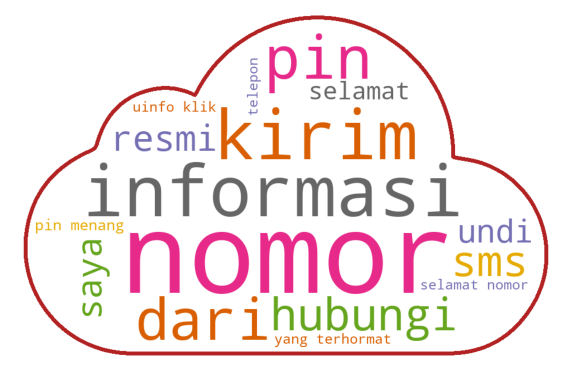

In [ ]:
# WordCloud Label SMS SPAM/FRAUD

sms_normal = spam_bi[spam_bi.label == 1]
normal_string = []

for t in sms_normal.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

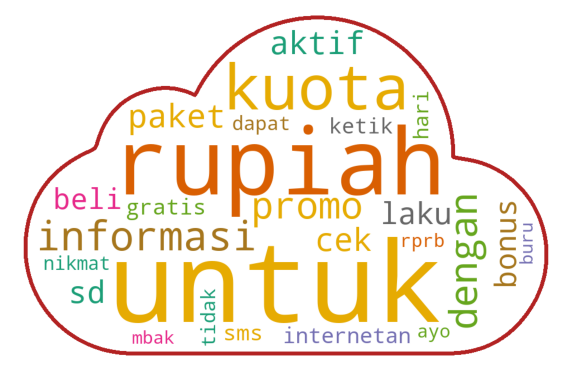

In [ ]:
# WordCloud Label SMS PROMO

sms_normal = spam_bi[spam_bi.label == 2]
normal_string = []

for t in sms_normal.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Student Activity



Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:
- Tentukan langkah pre-processing yang tepat untuk dataset di atas.
- Gunakan range `n_gram` yang berbeda. Amati apa perbedaannya.
- Menurut Anda, apakah `term` yang dihasilkan (`X_kbest_features`) pada feature selection sudah memiliki informasi yang relevan?

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa Deadline: 23.59 Jum'at
